In [1]:
import pandas as pd
from sklearn.feature_extraction.comment import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import re
import spacy
from collections import Counter
from xgboost import XGBClassifier

In [14]:
import re
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
import spacy

# Download necessary NLTK data
nltk.download('stopwords')

# Download and load spaCy model
spacy.cli.download("fr_core_news_sm")
nlp = spacy.load('fr_core_news_sm')

# Load the data from the CSV file
file_path = 'youtube_comments_cleaned.csv'
data = pd.read_csv(file_path)

# Define French stopwords
stop_words = set(stopwords.words('english'))

# clean text

def clean_text(comment):

    # Check if the comment is NaN

    if pd.isnull(comment):

        return []
    # Convert comment to string

    comment = str(comment)
# Remove punctuation and special characters

    comment = re.sub(r'\W+', ' ', comment)
    # Convert to lowercase

    comment = comment.lower()
    # Tokenize using spaCy

    doc = nlp(comment)
    tokens = [token.lemma_ for token in doc]

    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Remove short words
    tokens = [token for token in tokens if len(token) > 2]

    return tokens
# Apply cleaning function
data['Cleaned_Tokens'] = data['comment'].apply(lambda x: clean_text(x))
data.to_csv('data1.csv', index=False)

# Display the first few rows of the updated dataframe
data.head()





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,time,comment,Cleaned_Tokens
0,2024-05-10T17:06:20Z,Do you think the TikTok ban will be enacted? S...,"[think, tiktok, ban, enacted, start, saving, r..."
1,2024-05-15T19:03:38Z,youts?,[yout]
2,2024-05-15T18:42:03Z,Thank you for this. Really good job breaking e...,"[thank, thi, really, good, job, breaking, ever..."
3,2024-05-15T18:35:09Z,The sheer number of people that ByteDsnce is p...,"[sheer, number, people, bytedsnce, paying, tak..."
4,2024-05-15T18:33:35Z,Legal arguments regarding constitutional free ...,"[legal, argument, regarding, constitutional, f..."


In [15]:
file_path = 'data1.csv'
data = pd.read_csv(file_path)

#flatten the list of tokens to create a single list of all words
all_words = [word for tokens in data['Cleaned_Tokens'] for word in tokens]

#falculate the frequency of each word
word_freq = Counter(all_words)

#define a threshold for rare words (e.g., words that appear less than 5 times)
threshold = 5

#create a set of rare words
rare_words = {word for word, freq in word_freq.items() if freq < threshold}

#function to remove rare words from tokenized text
def remove_rare_words(tokens):
    return [token for token in tokens if token not in rare_words]

#apply the function to remove rare words
data['Cleaned_Tokens'] = data['Cleaned_Tokens'].apply(remove_rare_words)
data['Cleaned_Text'] = data['Cleaned_Tokens'].apply(lambda x: ' '.join(x))

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data
file_path = 'data1.csv'
data_new = pd.read_csv(file_path)

# Set the random seed for reproducibility
np.random.seed(42)

# Adding a random Sentiment column for demonstration
data_new['Sentiment'] = np.random.choice([0, 1], size=len(data_new))

# Convert Cleaned_Tokens to Cleaned_Text by joining tokens with space
data_new['Cleaned_Text'] = data_new['Cleaned_Tokens'].apply(lambda x: ' '.join(eval(x)))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_new['Cleaned_Text'], data_new['Sentiment'], test_size=0.2, random_state=42)

# Check for non-empty Cleaned_Text values
num_non_empty_train = sum(X_train.str.strip() != '')
num_non_empty_test = sum(X_test.str.strip() != '')

# Adjusting the TF-IDF vectorizer parameters
vectorizer = TfidfVectorizer(
    max_features=5000,  
    ngram_range=(1, 2),  
    max_df=0.95,
    min_df=1  # Lowering min_df to include more terms
)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Vocabulary size and transformed data shapes
vocabulary_size = len(vectorizer.vocabulary_)
X_train_tfidf_shape = X_train_tfidf.shape
X_test_tfidf_shape = X_test_tfidf.shape

print(f"Number of non-empty Cleaned_Text in training set: {num_non_empty_train}")
print(f"Number of non-empty Cleaned_Text in testing set: {num_non_empty_test}")
print(f"TF-IDF vocabulary size: {vocabulary_size}")
print(f"Shape of X_train_tfidf: {X_train_tfidf_shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf_shape}")



Number of non-empty Cleaned_Text in training set: 2358
Number of non-empty Cleaned_Text in testing set: 590
TF-IDF vocabulary size: 5000
Shape of X_train_tfidf: (2388, 5000)
Shape of X_test_tfidf: (597, 5000)


In [43]:
!pip install smote
!pip install imbalanced-learn
!pip install GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

ERROR: Could not find a version that satisfies the requirement GridSearchCV (from versions: none)
ERROR: No matching distribution found for GridSearchCV


In [44]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)
print(data.columns)

Index(['time', 'comment', 'Cleaned_Tokens', 'Sentiment'], dtype='object')


In [52]:
import pandas as pd
from textblob import TextBlob

# Load the data
file_path = 'data1_with_sentiment.csv'  # Update this path
data = pd.read_csv(file_path)

# Ensure Cleaned_Tokens are lists
data['Cleaned_Tokens'] = data['Cleaned_Tokens'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Define the sentiment classification function for 3 classes
def classify_sentiment_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return "pour ban"  # Positive sentiment
    elif polarity < -0.1:
        return "contre ban"  # Negative sentiment
    else:
        return "neutre"  # Neutral sentiment

# Apply sentiment classification
data['Sentiment_3_classes'] = data['Cleaned_Tokens'].apply(lambda x: classify_sentiment_textblob(' '.join(x)))

# Save the data to a CSV file
output_file_path = 'data1_with_3_class_sentiment.csv'  # Update this path
data.to_csv(output_file_path, index=False)

# Display the first few rows of the updated dataframe
print(data.head())



                   time                                            comment  \
0  2024-05-10T17:06:20Z  Do you think the TikTok ban will be enacted? S...   
1  2024-05-15T19:03:38Z                                             youts?   
2  2024-05-15T18:42:03Z  Thank you for this. Really good job breaking e...   
3  2024-05-15T18:35:09Z  The sheer number of people that ByteDsnce is p...   
4  2024-05-15T18:33:35Z  Legal arguments regarding constitutional free ...   

                                      Cleaned_Tokens  Sentiment  \
0  [think, tiktok, ban, enacted, start, saving, r...          2   
1                                             [yout]          2   
2  [thank, thi, really, good, job, breaking, ever...          0   
3  [sheer, number, people, bytedsnce, paying, tak...          2   
4  [legal, argument, regarding, constitutional, f...          2   

  Sentiment_3_classes  
0            pour ban  
1              neutre  
2            pour ban  
3            pour ban  
4       

           Count  Proportion
Sentiment                   
0             91    0.030486
1             26    0.008710
2           2868    0.960804


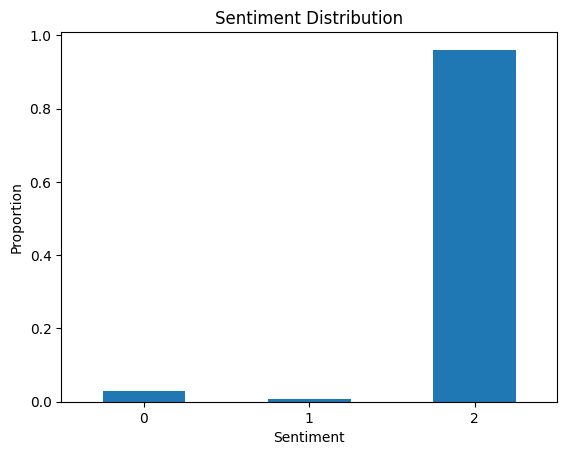

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
#textblob distribution
file_path = 'data1_with_3_class_sentiment.csv'
data = pd.read_csv(file_path)

sentiment_counts = data['Sentiment'].value_counts().sort_index()
sentiment_proportions = sentiment_counts / len(data)
sentiment_summary = pd.DataFrame({
    'Count': sentiment_counts,
    'Proportion': sentiment_proportions
})
print(sentiment_summary)

#textblob distribution
sentiment_summary.plot(kind='bar', y='Proportion', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

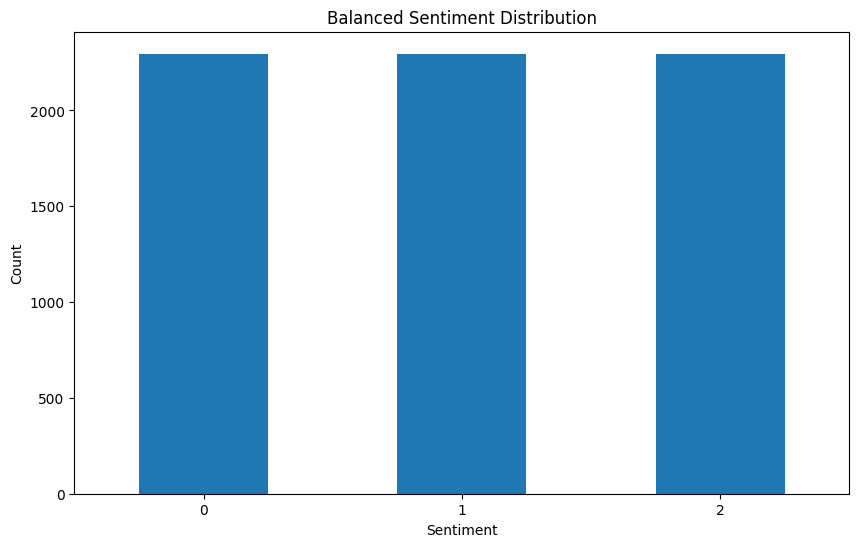

In [54]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

file_path = 'data1_with_3_class_sentiment.csv'
data = pd.read_csv(file_path)

data['Cleaned_Tokens'] = data['Cleaned_Tokens'].apply(eval)

X = data['Cleaned_Tokens'].apply(lambda x: ' '.join(x))
y = data['Sentiment']

#Tf-idf
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

#split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# display the distribution
balanced_counts = pd.Series(y_train_balanced).value_counts().sort_index()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
balanced_counts.plot(kind='bar')
plt.title('Balanced Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#train the model random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_balanced, y_train_balanced)
rf_predictions = rf_model.predict(X_test)

#ecaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9865996649916248
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       1.00      0.20      0.33         5
           2       0.99      1.00      0.99       572

    accuracy                           0.99       597
   macro avg       1.00      0.67      0.74       597
weighted avg       0.99      0.99      0.98       597



In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

#train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_balanced, y_train_balanced)
nb_predictions = nb_model.predict(X_test)

# evaluate the Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.8927973199329984
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.90      0.38        20
           1       0.12      0.20      0.15         5
           2       1.00      0.90      0.95       572

    accuracy                           0.89       597
   macro avg       0.46      0.67      0.49       597
weighted avg       0.97      0.89      0.92       597



In [57]:
from xgboost import XGBClassifier

#train the model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_balanced, y_train_balanced)
xgb_predictions = xgb_model.predict(X_test)

#evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.981574539363484
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       1.00      0.20      0.33         5
           2       1.00      0.99      0.99       572

    accuracy                           0.98       597
   macro avg       0.88      0.71      0.70       597
weighted avg       0.99      0.98      0.98       597



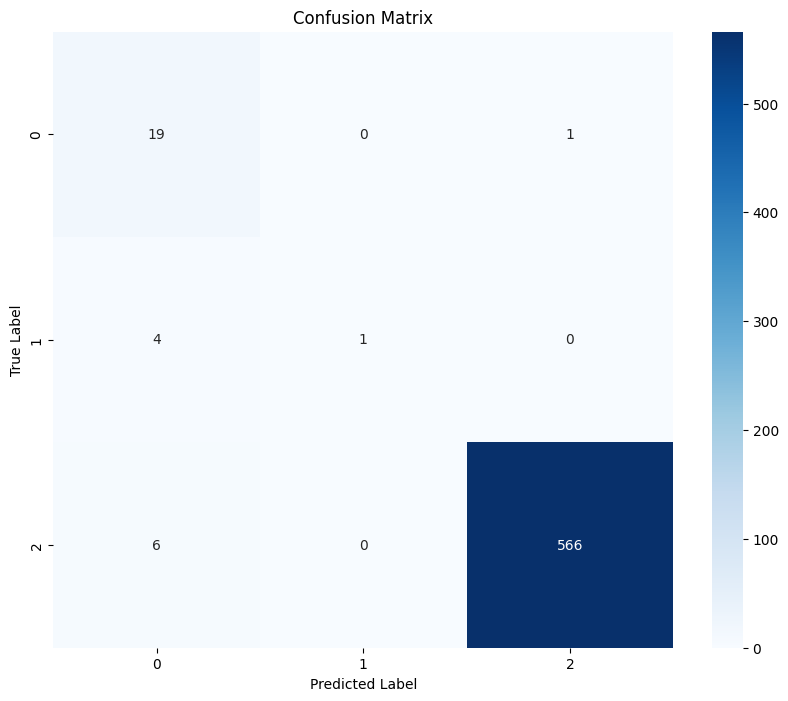

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, xgb_predictions, labels=xgb_model.classes_)

cm_df = pd.DataFrame(cm, index=xgb_model.classes_, columns=xgb_model.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()